# Unsupervised learning - dimensionality reduction
## Non-linear methods for dimensionality reduction - Manifold learning

Follow:
- _Python Data Science Handbook_ [Chapter 5 In Depth: Manifold learning](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.10-Manifold-Learning.ipynb) (p.445-455)
- _Introduction to Machine Learning_ [Chapter 3](https://github.com/amueller/introduction_to_ml_with_python/blob/master/03-unsupervised-learning.ipynb) **Section 3.4.3 Manifold Learning with t-SNE** (p.165-170)


PCA reduces dimension by projection onto hyperplanes. It is a linear method.

An alternative is to perform Manifold learning, a non-linear technique.

A word of caution:
>... in practice manifold learning techniques tend to be finicky enough that they are rarely used for anything more than simple qualitative visualization of high-dimensional data.

## What is manifold learning?

Python Data Science Handbook Chapter 5: Manifold Learning

>We have seen how principal component analysis can be used in the dimensionality reduction task—reducing the number of features of a dataset while maintaining the essential relationships between the points. While PCA is flexible, fast, and easily interpretable, it does not perform so well when there are nonlinear relationships within the data; we will see some examples of these below.

>To address this deficiency, we can turn to a class of methods known as manifold learning—a class of unsupervised estimators that seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces. When you think of a manifold, I’d suggest imagining a sheet of paper: this is a two-dimensional object that lives in our familiar three-dimensional world, and can be bent or rolled in two dimensions. In the parlance of manifold learning, we can think of this sheet as a two-dimensional manifold embedded in three-dimensional space.

>Rotating, reorienting, or stretching the piece of paper in three-dimensional space doesn’t change the flat geometry of the paper: such operations are akin to linear embeddings. If you bend, curl, or crumple the paper, it is still a two-dimensional manifold, but the embedding into the three-dimensional space is no longer linear. Manifold learning algorithms would seek to learn about the fundamental two-dimensional nature of the paper, even as it is contorted to fill the three-dimensional space.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## t-SNE
From _Hands on Machine learning with scikit-learn_ Chapter 8 Dimensionality Reduction:
>t-Distributed Stochastic Neighbor Embedding (t-SNE) reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space (e.g., to visualize the MNIST images in 2D).

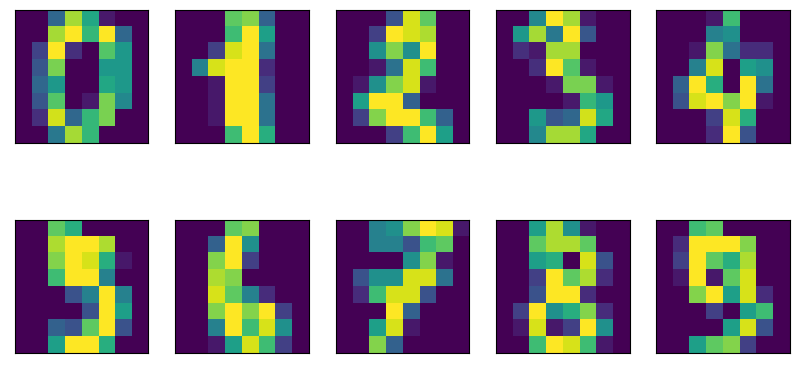

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Let’s use PCA to visualize the data reduced to two dimensions. We plot the first two principal components, and represent each sample with a digit corresponding to its class:

Text(0, 0.5, 'Second principal component')

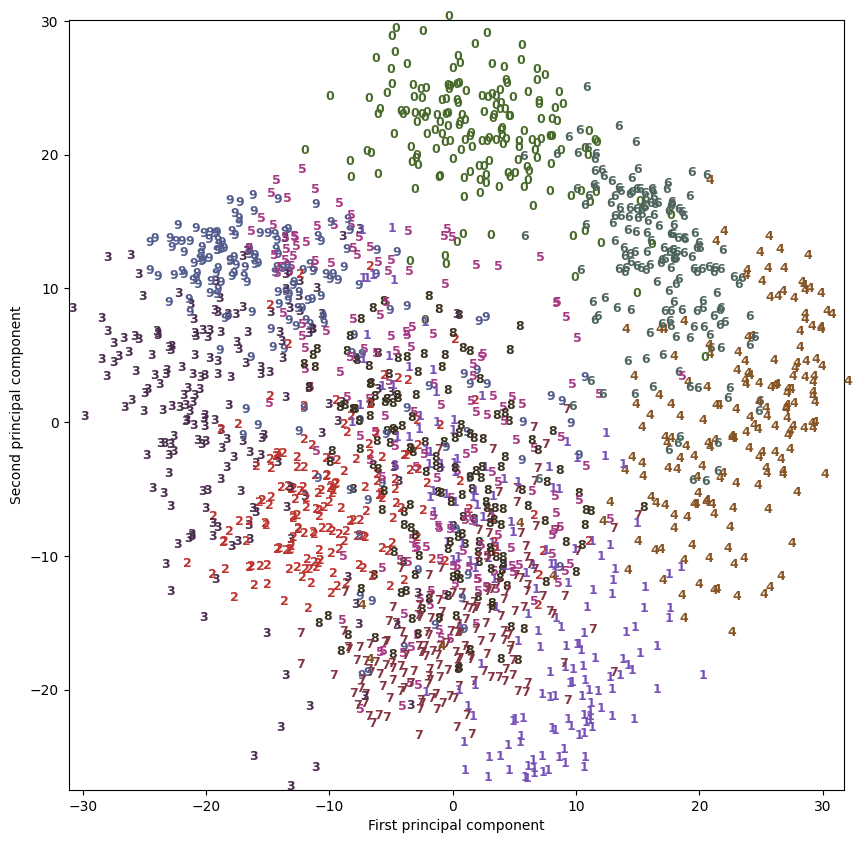

In [3]:
# build a PCA model
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Here, we actually used the true digit classes as glyphs, to show which class is where. The digits zero, six, and four are relatively well separated using the first two principal components, though they still overlap. Most of the other digits overlap significantly

Let’s apply t-SNE to the same dataset, and compare the results. As t-SNE does not support transforming new data, the `TSNE` class has no `transform` method. Instead, we can call the `fit_transform` method, which will build the model and immediately return the transformed data:

In [4]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

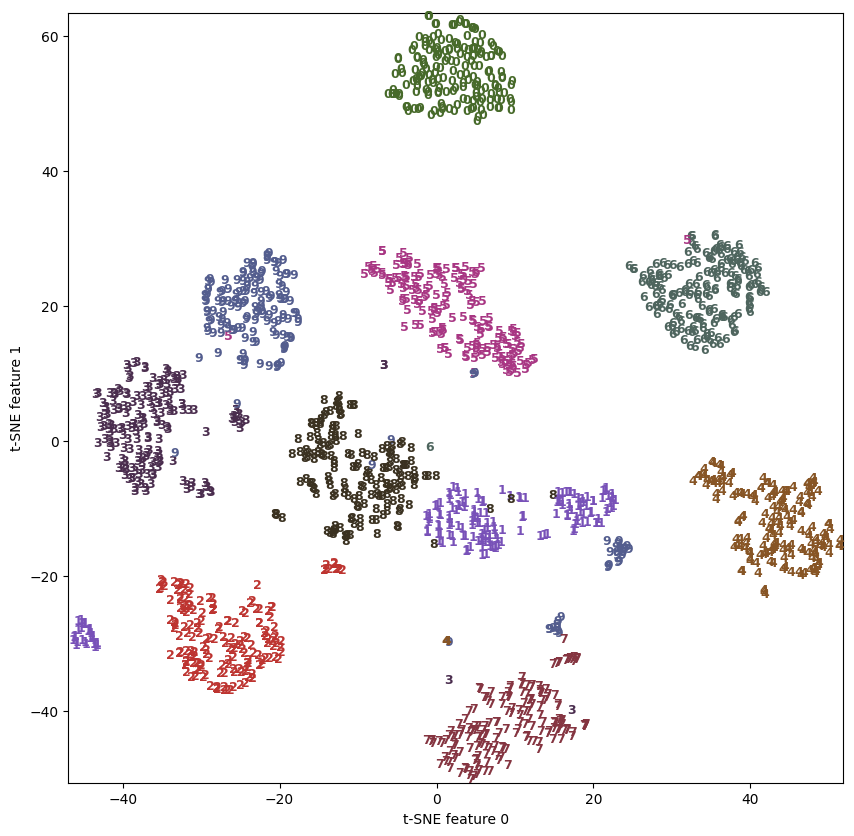

In [5]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

The result of t-SNE is quite remarkable. All the classes are quite clearly separated. The ones and nines are somewhat split up, but most of the classes form a single dense group. Keep in mind that this method has no knowledge of the class labels: it is completely unsupervised. Still, it can find a representation of the data in two dimensions that clearly separates the classes, based solely on how close points are in the original space

## Isomap

From _Hands on Machine learning with scikit-learn_ Chapter 8 Dimensionality Reduction:
> Isomap creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the geodesic distances between the instances. The geodesic distance between two nodes in a graph is the number of nodes on the shortest path between these nodes

Code from Python Data Science Handbook Chapter 5: [Manifold Learning](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.10-Manifold-Learning.ipynb)

### Labeled faces in the wild dataset

In [6]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

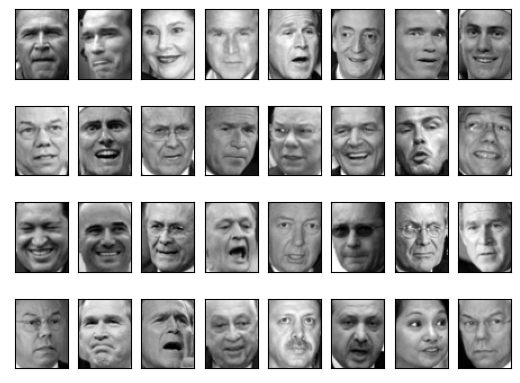

In [7]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

### PCA needs many components - relationship might be non-linear

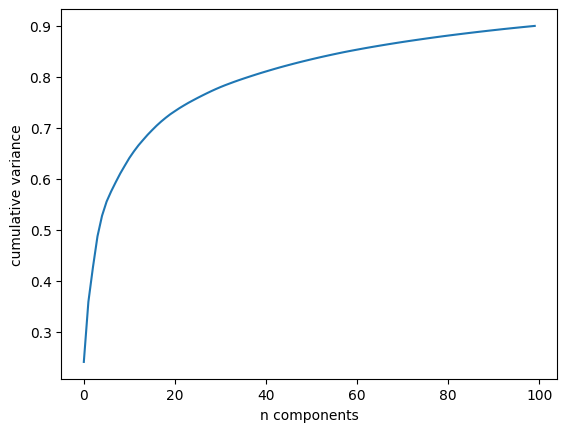

In [8]:
from sklearn.decomposition import PCA
model = PCA(100, svd_solver='randomized', random_state=88).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

### Isomap for visualization

In [9]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [10]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, zoom =1, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], zoom=zoom,cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

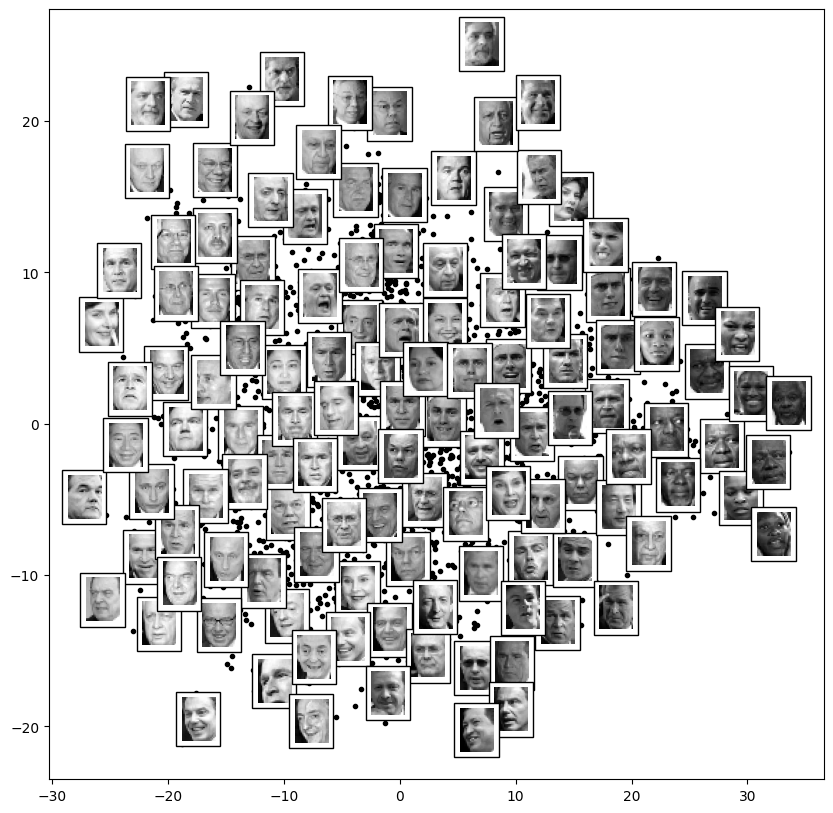

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

>The result is interesting: the first two Isomap dimensions seem to describe global image features: the overall darkness or lightness of the image from left to right, and the general orientation of the face from bottom to top. This gives us a nice visual indication of some of the fundamental features in our data.